In [ ]:
import os
import cv2

import shutil
import pandas as pd
import numpy as np

from shutil import move
from subprocess import call
from urllib.request import urlretrieve
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

import matplotlib.pyplot as plt

In [ ]:
# Creating the directories
base_dir = os.getcwd()

# Generating the paths
extraction_point = os.path.join(base_dir, 'data','extracted_raw')
processed_data_path = os.path.join(base_dir, 'data','processed')

# Generating the folders
os.makedirs(extraction_point)
os.makedirs(processed_data_path)

In [ ]:
# Downloading the data from git hub


dataset_url = "http://aisdatasets.informatik.uni-freiburg.de/" \
              "freiburg_groceries_dataset/freiburg_groceries_dataset.tar.gz"

print("Downloading dataset.")
urlretrieve(dataset_url, "../freiburg_groceries_dataset.tar.gz")
print("Extracting dataset.")
call(["tar", "-xf", "../freiburg_groceries_dataset.tar.gz", "-C", extraction_point])
os.remove("../freiburg_groceries_dataset.tar.gz")
print("Done.")

Extracting dataset.
Done.


In [ ]:
image_path = '/content/data/extracted_raw/images/BEANS/BEANS0002.png'

image_matrix = cv2.imread(image_path)
image_matrix.shape

(256, 256, 3)

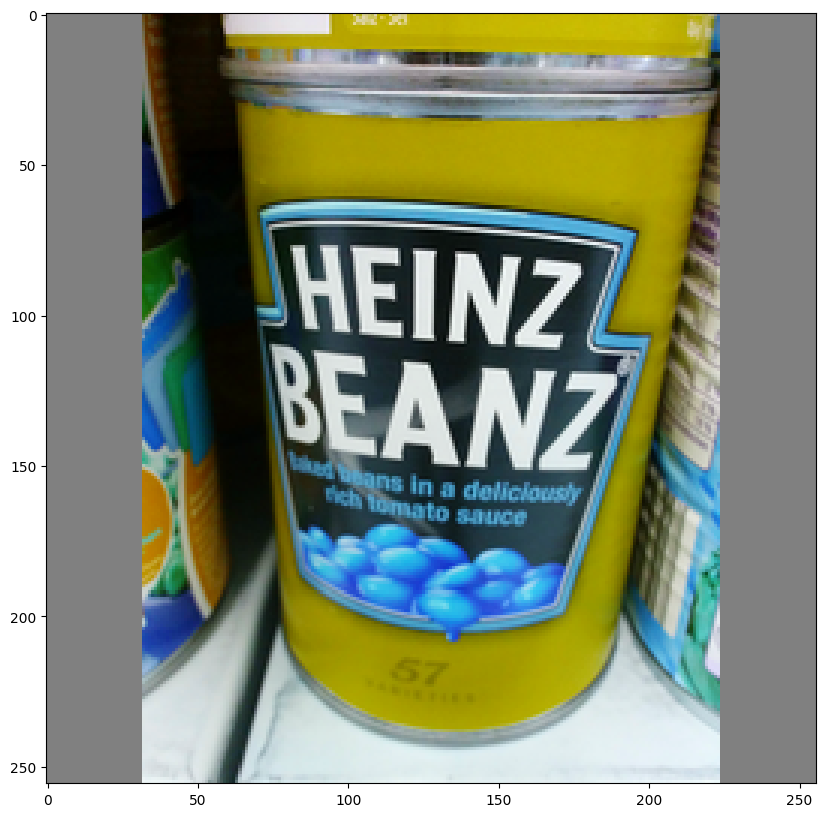

In [ ]:
plt.figure(figsize = (12,10))
plt.imshow(image_matrix)
plt.show()

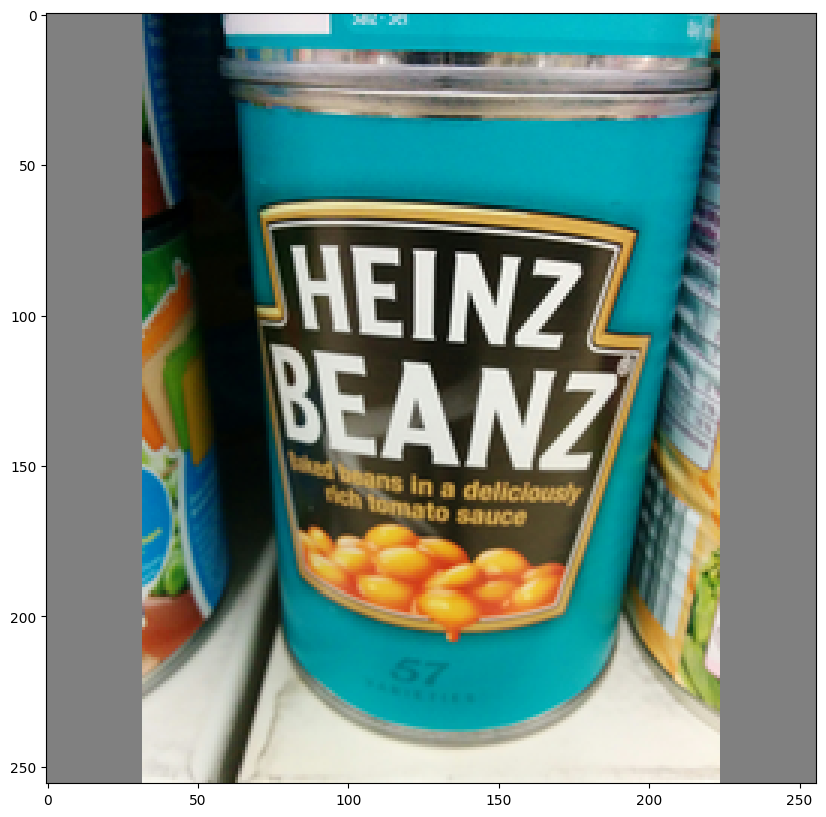

In [ ]:
plt.figure(figsize = (12,10))
plt.imshow(cv2.cvtColor(image_matrix, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
def directory_system_generator(source_directory, sink_directory):
  train_path, test_path = os.path.join(sink_directory,'train'), os.path.join(sink_directory,'test')
  classes = os.listdir(source_directory)

  train_classes_path = [os.path.join(train_path, class_) for class_ in classes]
  test_classes_path = [os.path.join(test_path, class_) for class_ in classes]

  print('working on the training directories')

  try:
    list(map(os.makedirs, train_classes_path))

  except Exception as e:
    print('directory already exist')

  print('working on the testing directories')

  try:
    list(map(os.makedirs, test_classes_path))

  except Exception as e:
    print('directory already exist')

  print("*" * 114)

  return train_path, test_path, classes


In [ ]:
train_path, test_path, classes = directory_system_generator(source_directory = '/content/data/extracted_raw/images', sink_directory = '/content/data/processed')

working on the training directories
working on the testing directories
******************************************************************************************************************


In [ ]:
classes

['JUICE',
 'OIL',
 'NUTS',
 'CAKE',
 'CANDY',
 'VINEGAR',
 'HONEY',
 'CHIPS',
 'JAM',
 'FLOUR',
 'COFFEE',
 'CHOCOLATE',
 'TOMATO_SAUCE',
 'WATER',
 'SODA',
 'SUGAR',
 'BEANS',
 'SPICES',
 'FISH',
 'TEA',
 'MILK',
 'RICE',
 'CORN',
 'CEREAL',
 'PASTA']

In [ ]:
source_directory = '/content/data/extracted_raw/images'

for class_ in classes:
  print(f'total images in {class_} class : {len(os.listdir(os.path.join(source_directory, class_)))}')

total images in JUICE class : 302
total images in OIL class : 143
total images in NUTS class : 168
total images in CAKE class : 161
total images in CANDY class : 372
total images in VINEGAR class : 157
total images in HONEY class : 185
total images in CHIPS class : 181
total images in JAM class : 241
total images in FLOUR class : 109
total images in COFFEE class : 298
total images in CHOCOLATE class : 307
total images in TOMATO_SAUCE class : 171
total images in WATER class : 262
total images in SODA class : 177
total images in SUGAR class : 118
total images in BEANS class : 136
total images in SPICES class : 207
total images in FISH class : 110
total images in TEA class : 283
total images in MILK class : 162
total images in RICE class : 150
total images in CORN class : 97
total images in CEREAL class : 278
total images in PASTA class : 172


In [ ]:
def files_mover(source_directory, sink_directory, classes, test_size = 0.2, random_state = 64, format = '.png'):
  for class_name in classes:
    print(f'working on {class_name} class')

    class_src_path = os.path.join(source_directory, class_name)
    all_images = [i for i in os.listdir(class_src_path) if i.endswith(format)]
    print(f'total images found : {len(all_images)}')

    all_images = pd.Series(all_images)
    train, test = train_test_split(all_images, test_size = test_size, random_state = random_state)

    train_source_paths = [os.path.join(class_src_path, file_path) for file_path in train]
    train_data_sink = os.path.join(sink_directory, 'train',class_name)
    train_sink_paths = [os.path.join(train_data_sink,file_path) for file_path in train]

    test_source_paths = [os.path.join(class_src_path, file_path) for file_path in test]
    test_data_sink = os.path.join(sink_directory, 'test',class_name)
    test_sink_paths = [os.path.join(test_data_sink,file_path) for file_path in test]

    list(map(move,train_source_paths, train_sink_paths))
    list(map(move,test_source_paths, test_sink_paths))

    print(f'all files moved for {class_name} calss')
    print("*"*114)

  print('sucessful')

In [ ]:
files_mover(source_directory= '/content/data/extracted_raw/images',
            sink_directory='/content/data/processed',
            classes = classes)

working on JUICE class
total images found : 302
all files moved for JUICE calss
******************************************************************************************************************
working on OIL class
total images found : 143
all files moved for OIL calss
******************************************************************************************************************
working on NUTS class
total images found : 168
all files moved for NUTS calss
******************************************************************************************************************
working on CAKE class
total images found : 161
all files moved for CAKE calss
******************************************************************************************************************
working on CANDY class
total images found : 372
all files moved for CANDY calss
******************************************************************************************************************
working on VINEGAR class
total im

In [ ]:
#Modeling

In [ ]:
# Processing and generating the training data
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   zoom_range = 0.3,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   vertical_flip = True,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')
test_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                     target_size = (256,256),
                                                     batch_size = 10,
                                                     classes = classes,
                                                     class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size = (256,256),
                                                  batch_size = 10,
                                                  classes = classes,
                                                  class_mode = 'categorical')

Found 3945 images belonging to 25 classes.
Found 1002 images belonging to 25 classes.


In [ ]:
#CNN

In [ ]:
#--------------------------------------Building the structure of CNN---------------
cnn = tf.keras.Sequential()

# adding the input layer
cnn.add(tf.keras.layers.Input(shape = (256,256,3)))

# adding the first conv-pooling layer set
cnn.add(tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, padding = 'same'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = 2, padding = 'same'))

# adding the second conv-pooling layer set
cnn.add(tf.keras.layers.Conv2D(filters = 20, kernel_size = 3, padding = 'same'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = 2, padding = 'same'))

# adding the third conv-pooling layer set
cnn.add(tf.keras.layers.Conv2D(filters = 20, kernel_size = 3, padding = 'same'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = 2, padding = 'same'))

# Flattening the data
cnn.add(tf.keras.layers.Flatten())

# adding the ANN
cnn.add(tf.keras.layers.Dense(units = 100, activation = 'relu', kernel_initializer='he_normal'))
cnn.add(tf.keras.layers.Dense(units = 150, activation = 'relu', kernel_initializer='he_uniform'))
cnn.add(tf.keras.layers.Dense(units = 200, activation = 'relu', kernel_initializer='he_normal'))
cnn.add(tf.keras.layers.Dense(units = 150, activation = 'relu', kernel_initializer='he_uniform'))
cnn.add(tf.keras.layers.Dense(units = 200, activation = 'relu', kernel_initializer='he_uniform'))

cnn.add(tf.keras.layers.Dense(units = len(classes), activation = 'softmax', kernel_initializer='glorot_normal'))

# compiling the model
cnn.compile(optimizer= 'Adam',
            loss = 'categorical_crossentropy',
            metrics = ['accuracy','Precision','Recall'])

In [ ]:
# Summarizing the model
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 20)      1820      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 20)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 20)        3620      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 20)       0

In [ ]:
cnn_history_obj = cnn.fit_generator(generator = train_generator,
                                    validation_data = test_generator,
                                    epochs = 100,
                                    use_multiprocessing=True,
                                    workers = 10)

<ipython-input-18-afba517da744>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_history_obj = cnn.fit_generator(generator = train_generator,


Epoch 1/100
395/395 [==============================] - 106s 228ms/step - loss: 3.1259 - accuracy: 0.0978 - precision: 0.3000 - recall: 0.0023 - val_loss: 3.1070 - val_accuracy: 0.1118 - val_precision: 0.2353 - val_recall: 0.0040
Epoch 2/100
395/395 [==============================] - 88s 219ms/step - loss: 3.0644 - accuracy: 0.1148 - precision: 0.4000 - recall: 0.0035 - val_loss: 3.1087 - val_accuracy: 0.1238 - val_precision: 0.5000 - val_recall: 0.0130
Epoch 3/100
395/395 [==============================] - 89s 221ms/step - loss: 3.0097 - accuracy: 0.1257 - precision: 0.4545 - recall: 0.0063 - val_loss: 2.9687 - val_accuracy: 0.1297 - val_precision: 0.5000 - val_recall: 0.0020
Epoch 4/100
395/395 [==============================] - 90s 220ms/step - loss: 2.9659 - accuracy: 0.1414 - precision: 0.4894 - recall: 0.0117 - val_loss: 3.0383 - val_accuracy: 0.1267 - val_precision: 0.2143 - val_recall: 0.0030
Epoch 5/100
395/395 [==============================] - 89s 221ms/step - loss: 2.9212 - 

In [ ]:
#Model Evalution

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


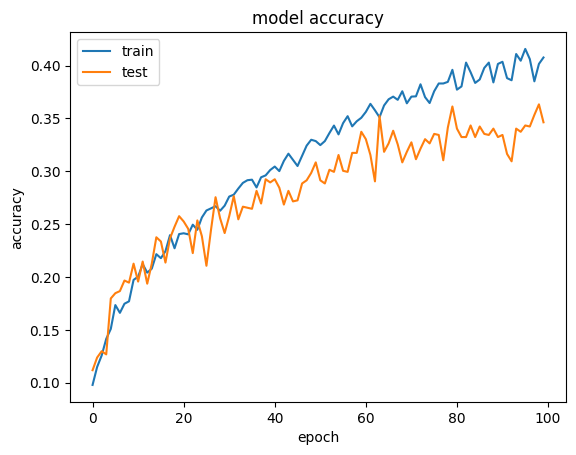

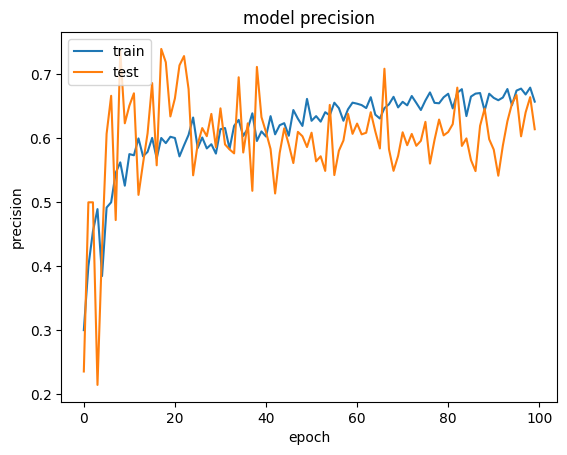

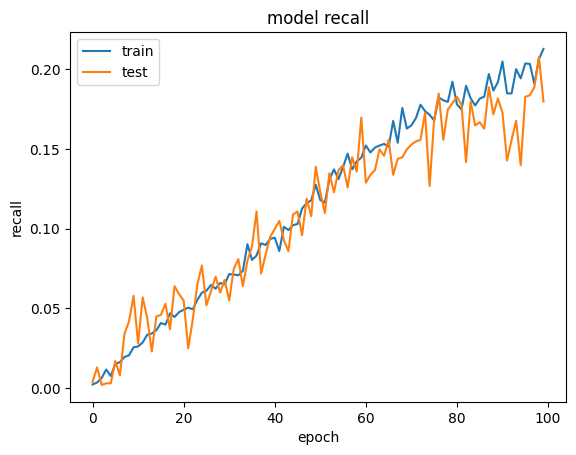

In [ ]:
# list of all data in history obj
print(cnn_history_obj.history.keys())

# summarizing history for accuracy
plt.plot(cnn_history_obj.history['accuracy'])
plt.plot(cnn_history_obj.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

# summarizing history for precision
plt.plot(cnn_history_obj.history['precision'])
plt.plot(cnn_history_obj.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

# summarizing history for recall
plt.plot(cnn_history_obj.history['recall'])
plt.plot(cnn_history_obj.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [ ]:
#Saving the model

In [ ]:
# creating the directory
model_weight_dir = 'Weight'
os.makedirs(model_weight_dir, exist_ok = True)

# Saving the models weights
cnn.save(os.path.join(model_weight_dir,'Best_model.tf'), save_format = 'tf')

In [ ]:
# Loading the saved model

model = tf.keras.models.load_model('/content/Weight/Best_model.tf')

In [ ]:
# Suammarizing the loaded model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 20)      1820      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 20)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 20)        3620      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 20)       0